In [4]:
%reset -f

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex')

labelsize=12

# phase transition

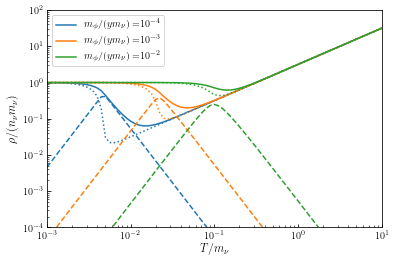

In [3]:
m_ph_x=1e-4
# plt.plot(T_nu,0.0456727*T_nu**3/m_ph_x**2,color="k",lw=0.5)
# plt.plot(T_nu,5.47373*m_ph_x**2/T_nu**3,color="k",lw=0.5)

for i,x in enumerate([1,10,100]):
    p=str(-4+int(np.log10(x)))
    data=np.loadtxt("data/phase_trans_all"+str(x)+".dat")
    T_nu=data[:,0]
    n_nu=data[:,1]
    rho_nu=data[:,2]
    rho_phi=data[:,3]
    col="C"+str(i)
    plt.plot(T_nu,(rho_nu)/n_nu,color=col,ls=":")
    plt.plot(T_nu,(rho_phi)/n_nu,color=col,ls="--")
         
    plt.plot(T_nu,(rho_nu+rho_phi)/n_nu,color=col,label=r"$m_{\phi}/(y m_{\nu})=$"+r"$10^{"+p+r"}$")


# plt.plot([1e-1,1],[1,1],ls="--",color="k")
    

plt.xlim(1e-3,1e1)
plt.ylim(1e-4,1e2)


plt.xlabel(r"$T/m_{\nu}$",fontsize=labelsize)
plt.ylabel(r"$\rho/(n_{\nu} m_{\nu})$ ",fontsize=labelsize)
plt.tick_params(which="both",direction="in")
plt.loglog()
plt.legend()
plt.savefig(r'../fig/phase_trans2.pdf',  bbox_inches='tight')
plt.show()

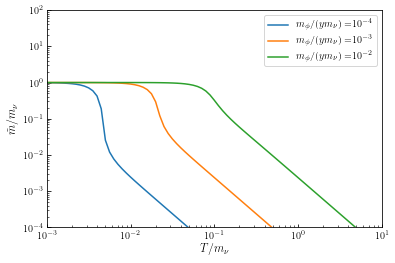

In [51]:
for i,x in enumerate([1,10,100]):
    p=str(-4+int(np.log10(x)))
    data=np.loadtxt("data/phase_trans_all"+str(x)+".dat")
    T_nu=data[:,0]
    n_nu=data[:,1]
    mt=data[:,4]

    col="C"+str(i)
         
    plt.plot(T_nu,mt,color=col,label=r"$m_{\phi}/(y m_{\nu})=$"+r"$10^{"+p+r"}$")

    

plt.xlim(1e-3,1e1)
plt.ylim(1e-4,1e2)


plt.xlabel(r"$T/m_{\nu}$",fontsize=labelsize)
plt.ylabel(r"$\tilde{m}/m_{\nu}$ ",fontsize=labelsize)
plt.tick_params(which="both",direction="in")
plt.loglog()
plt.legend()
plt.savefig(r'../fig/phase_trans_mt.pdf',  bbox_inches='tight')
plt.show()

# schrodinger equation

In [14]:
import h5py

f1  = h5py.File(r"data/sch_soly1.h5", 'r')   # 'r' means that hdf5 file is open in read-only mode
print (f1.keys())
curves=np.copy(f1[u'curves'])
dlist=np.copy(f1[u'dlist'])
print (dlist)
thetalist=np.copy(f1[u'thetalist'])
num_of_curves=np.copy(f1[u'num_of_curves'])
Rlist=np.copy(f1[u'Rlist'])
print("Rlist=",Rlist)
f1.close()

<KeysViewHDF5 ['Rlist', 'curves', 'dlist', 'num_of_curves', 'thetalist']>
[0.5 0.9 3.6 9. ]
Rlist= [1000  100  100  100]


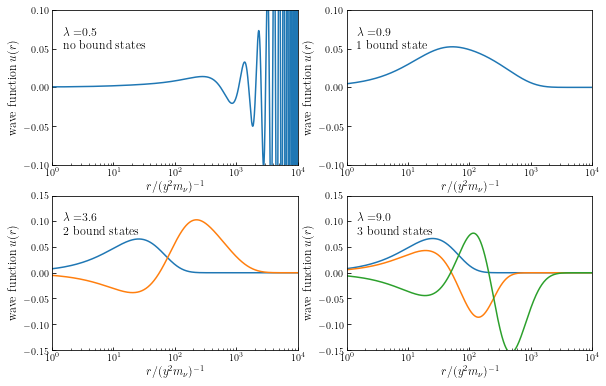

In [27]:
status_string=['no bound states','1 bound state', '2 bound states', '3 bound states']

fig, axs = plt.subplots(2,2)



index=0;
for i,ax in enumerate([axs[0,0],axs[0,1],axs[1,0],axs[1,1]]):    
    for j, curve in enumerate(curves[index:index+num_of_curves[i]]):
        vlist=curve
        sign=1
        if i==2 and j==1:
            sign=-sign
        ulist=sign*vlist/np.cos(thetalist)
        R=Rlist[i]
        rlist=R*np.tan(thetalist)
        ax.plot(rlist,ulist,alpha=1)
        
        
    ax.tick_params(axis="both",which="both",direction="in")
    xmin=1
    ax.set_xlim(xmin,R*[10,100,100,100][i])
    ax.set_xscale('log')
    ymax=[0.1,0.1,0.15,0.15][i]        
    ax.set_ylim(-ymax,ymax)
    ax.text(1.5*xmin,0.5*ymax,'$\lambda=$'+str(dlist[i])+'\n '+status_string[i],fontsize=labelsize)
    ax.set_xlabel(r"$r/(y^2 m_{\nu})^{-1}$",fontsize=labelsize)
    ax.set_ylabel(r"wave function $u(r)$",fontsize=labelsize)
        

    index+=num_of_curves[i]
    

plt.subplots_adjust(left=-0.35,bottom=-0.3)

# plt.savefig(r'/home/xj/Dropbox/mywork/neutrino_bound_states/draft/fig/sch.pdf',bbox_inches='tight')
plt.show()

# distribution

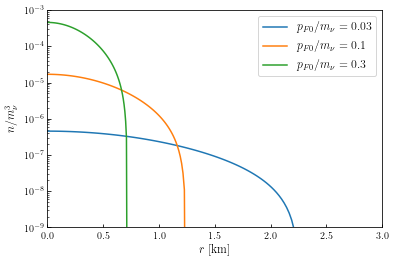

In [4]:
fig, ax = plt.subplots()

plt.yscale("log")
# plt.xscale("log")
# plt.xlabel(r"$r \times y\sqrt{\kappa m_{\nu}}$",fontsize=labelsize)
plt.xlabel(r"$r$ [km]",fontsize=labelsize)
plt.ylabel(r"$n/m_{\nu}^3$",fontsize=labelsize)

for name in ["xi_theta1.dat","xi_theta2.dat","xi_theta3.dat"]:
    xi_theta=np.loadtxt("data/"+name)
    plt.plot(xi_theta[:,0]/18.388,xi_theta[:,1]**(1.5))
plt.xlim([0,3])
plt.ylim([1e-9,1e-3])

# colorlist=["C0","C1","C2","C0","C1","C2"]
# for i,mv in enumerate(mvlist):
#     yyy=Rlist[i]
#     c=colorlist[i]
#     if mv[0]>1e-2:
#         ax.plot(ylist,yyy,ls='-',color=c)
#     else:
#         ax.plot(ylist,yyy,ls='--')
        
ax.legend([r"$p_{F0}/m_{\nu}=0.03$",
           r"$p_{F0}/m_{\nu}=0.1$",
           r"$p_{F0}/m_{\nu}=0.3$"
          ], 
          loc='upper right',fontsize=labelsize)

ax.tick_params(which="both",direction="in")

# ax.grid()
        
# plt.savefig(r'../fig/xi_theta.pdf',  bbox_inches='tight')

plt.show()

In [33]:
def fmt(x):
    if x>10:
        return '%.0f' % x
    return '%.1f' % x
fmt(44.34)

'44'

In [25]:
str(round(data[0,3],1))

'2.3440161173946302e+24'

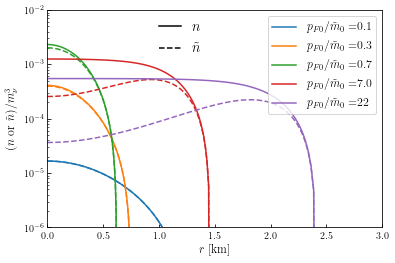

In [54]:
fig, ax = plt.subplots()

plt.yscale("log")
# plt.xscale("log")
# plt.xlabel(r"$r \times y\sqrt{\kappa m_{\nu}}$",fontsize=labelsize)
plt.xlabel(r"$r$ [km]",fontsize=labelsize)
plt.ylabel(r"($n$ or $\tilde{n}$)/$m_{\nu}^3$ ",fontsize=labelsize)

col_list=["C0","C1","C2","C3","C4"]
# for name in ["0.03","0.1","0.3","0.9","0.99","0.999"]:

for i,name in enumerate(["0.1","0.3","0.6","0.99","0.999"]):
    x=eval(name)
    y=1/np.sqrt(-1 + x**(-2)) 
    data=np.loadtxt("data/sol"+name+".dat")
    plt.plot(data[:,0],data[:,1],color=col_list[i],label=r"$p_{F0}/\tilde{m}_{0}=$"+fmt(y))
    plt.plot(data[:,0],data[:,2],ls="--",color=col_list[i])
plt.xlim([0,3])
plt.ylim([1e-6,1e-2])

plt.plot([1,1.2],[0.5e-2]*2,color="k")
plt.text(s=r"$n$",x=1.3,y=0.5e-2,color="k", verticalalignment='center',fontsize=1.2*labelsize)
plt.plot([1,1.2],[0.2e-2]*2,color="k",ls="--")
plt.text(s=r"$\tilde{n}$",x=1.3,y=0.2e-2,color="k", verticalalignment='center',fontsize=1.2*labelsize)

ax.legend(loc='upper right',fontsize=labelsize)

ax.tick_params(which="both",direction="in")

# ax.grid()
        
plt.savefig(r'../fig/relativistic.pdf',  bbox_inches='tight')

plt.show()